In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

#Here I am uploading libraries I think I might need to do analysis.

In [2]:
#Here I am reading in the CSV file and creating a Dataframe called "movies"

movies = pd.read_csv("imdb_1000.csv")
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


# Check the number of rows and columns.

In [3]:
movies.shape

(979, 6)

# Check the data type of each column

In [4]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

# Calculate the average movie duration.

In [5]:
movies.loc[:,"duration"].mean()

120.97957099080695

# Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
#These are the longest movies, since ascending=False, so they are sorted from longest to shortest

movies.sort_values(by="duration", ascending=False).head(3)        

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."


In [7]:
#These are the shortest movies, since ascending=True, so they are sorted from shortest to longest

movies.sort_values(by="duration", ascending=True).head(3)       

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."


# Create a histogram of duration, choosing an "appropriate" number of bins.

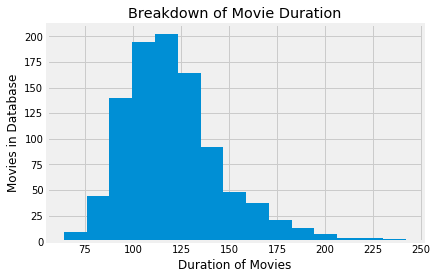

In [8]:
#For the histogram I chose 15 bins because 10 seemed a little too condensed, and 20 sort of exaggerated some outliers.
#15 bins seems nicely compact. 

movies.loc[:,"duration"].plot(kind='hist', bins=15)
plt.ylabel("Movies in Database")
plt.xlabel("Duration of Movies")
plt.title("Breakdown of Movie Duration");

# Use a box plot to display that same data.

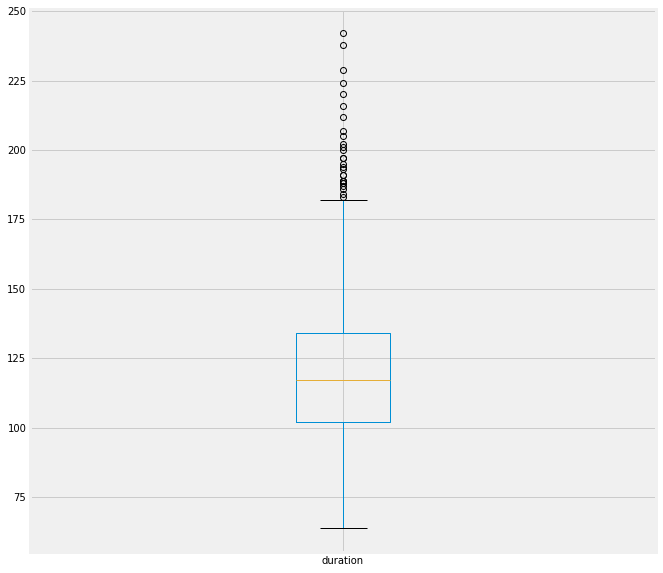

In [9]:
#I made the size of the box plot 10x10 since it seemed easier to read and interpret. 

ax = movies.loc[:,'duration'].plot(kind='box', figsize=(10,10))

# Count how many movies have each of the content ratings.

In [10]:
movies.loc[:,"content_rating"].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

# Use a visualization to display that same data, including a title and x and y labels.

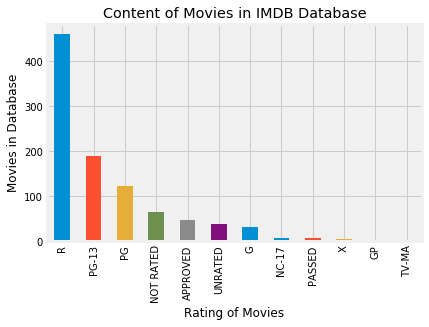

In [11]:
#I used a bar graph to display the value counts. 

movies.loc[:,"content_rating"].value_counts().plot(kind='bar')
plt.ylabel("Movies in Database")
plt.xlabel("Rating of Movies")
plt.title("Content of Movies in IMDB Database");

# Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
#I converted each value one by one since I honestly do not know how to do it all at once. 

movies.content_rating.replace(['NOT RATED'], ['UNRATED'], inplace=True)

In [13]:
#Here I am checking to see if my conversion worked, and it did since "Not Rated" is gone and "Unrated" has increased. 

movies.loc[:,"content_rating"].value_counts()

R           460
PG-13       189
PG          123
UNRATED     103
APPROVED     47
G            32
NC-17         7
PASSED        7
X             4
GP            3
TV-MA         1
Name: content_rating, dtype: int64

In [14]:
movies.content_rating.replace(['APPROVED'], ['UNRATED'], inplace=True)

In [15]:
movies.loc[:,"content_rating"].value_counts()

R          460
PG-13      189
UNRATED    150
PG         123
G           32
NC-17        7
PASSED       7
X            4
GP           3
TV-MA        1
Name: content_rating, dtype: int64

In [16]:
movies.content_rating.replace(['PASSED'], ['UNRATED'], inplace=True)

In [17]:
movies.loc[:,"content_rating"].value_counts()

R          460
PG-13      189
UNRATED    157
PG         123
G           32
NC-17        7
X            4
GP           3
TV-MA        1
Name: content_rating, dtype: int64

In [18]:
movies.content_rating.replace(['GP'], ['UNRATED'], inplace=True)

In [19]:
movies.loc[:,"content_rating"].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

# Convert the following content ratings to "NC-17": X, TV-MA.

In [20]:
movies.content_rating.replace(['X'], ['NC-17'], inplace=True)

In [21]:
movies.loc[:,"content_rating"].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       11
TV-MA        1
Name: content_rating, dtype: int64

In [22]:
movies.content_rating.replace(['TV-MA'], ['NC-17'], inplace=True)

In [23]:
movies.loc[:,"content_rating"].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

# Count the number of missing values in each column.

In [24]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [25]:
movies.loc[:, 'star_rating'].isna().sum()

0

In [26]:
movies.loc[:, 'title'].isna().sum()

0

In [27]:
movies.loc[:, 'content_rating'].isna().sum() #There are three missing values in Content Rating

3

In [28]:
movies.loc[:, 'genre'].isna().sum()

0

In [29]:
movies.loc[:, 'duration'].isna().sum()

0

In [30]:
movies.loc[:, 'actors_list'].isna().sum()

0

# If there are missing values: examine them, then fill them in with "reasonable" values.

In [31]:
movies.loc[movies.loc[:, 'content_rating'].isna(), :]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [32]:
#Here I am replacing missing values with "NA"

movies.loc[:,'content_rating'] = movies.loc[:, 'content_rating'].fillna(value='NA')

In [33]:
#Here I am checking to see if my replacement worked, and it did. 

movies.loc[:, 'content_rating'].isna().sum()

0

# Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [34]:
#In order to filter out movies 2 hours long I created two new Dataframes based on duration. 

long_movie = movies.loc[movies.loc[:, 'duration'] >= 120]

In [35]:
long_movie.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [36]:
long_movie.sort_values(by="duration", ascending=False).head(3)   

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."


In [37]:
long_movie.sort_values(by="duration", ascending=True).head(3)  

,star_rating,title,content_rating,genre,duration,actors_list
111,8.3,Some Like It Hot,UNRATED,Comedy,120,"[u'Marilyn Monroe', u'Tony Curtis', u'Jack Lem..."
880,7.5,My Cousin Vinny,R,Comedy,120,"[u'Joe Pesci', u'Marisa Tomei', u'Ralph Macchio']"
77,8.4,Oldeuboi,R,Drama,120,"[u'Min-sik Choi', u'Ji-tae Yu', u'Hye-jeong Ka..."


In [38]:
long_movie.loc[:,"star_rating"].mean()

7.948898678414082

In [39]:
short_movie = movies.loc[movies.loc[:, 'duration'] < 120]

In [40]:
short_movie.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
23,8.7,The Usual Suspects,R,Crime,106,"[u'Kevin Spacey', u'Gabriel Byrne', u'Chazz Pa..."
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
27,8.6,The Silence of the Lambs,R,Drama,118,"[u'Jodie Foster', u'Anthony Hopkins', u'Lawren..."
28,8.6,Leon: The Professional,R,Crime,110,"[u'Jean Reno', u'Gary Oldman', u'Natalie Portm..."


In [41]:
short_movie.loc[:,"star_rating"].mean()

7.838666666666657

In [42]:
#The average star rating for movies 120 minutes or more is 7.95, and the average star rating 
#for movies less than 120 minutes is 7.84

# Use a visualization to detect whether there is a relationship between duration and star rating.

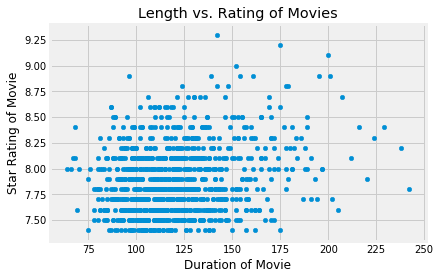

In [43]:
#Whenever I hear a relationship between two variables my first thought is a scatter plot, followed by a line graph if time is involved.

ax = movies.plot(kind='scatter', x='duration', y='star_rating')
plt.ylabel("Star Rating of Movie")
plt.xlabel("Duration of Movie")
plt.title("Length vs. Rating of Movies");

# Calculate the average duration for each genre.

In [44]:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

# Visualize the relationship between content rating and duration.

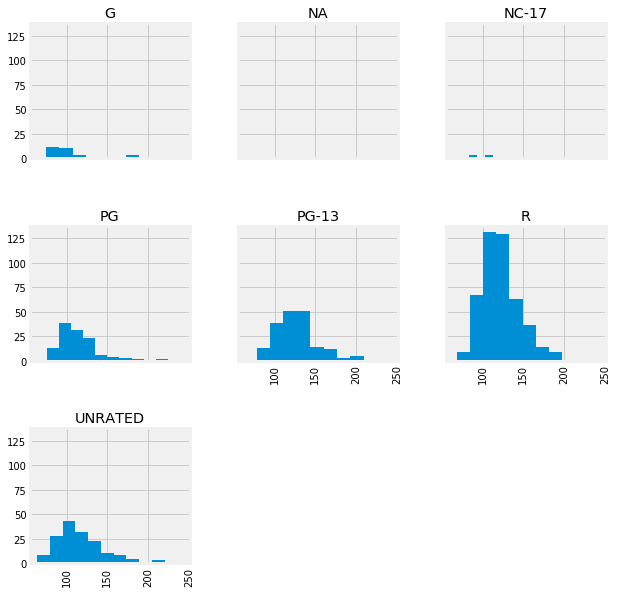

In [45]:
#I mainly chose histograms for this relationship because I don't think you can establish a *causal* relationship 
#between duration and content rating. I can see a causal relationship between duration and star rating, 
#so a scatter plot made more sense.

ax = movies.hist(column='duration', by='content_rating',sharex=True, sharey=True, figsize=(10,10))

# Find the title of the movie with the highest star rating in each genre

In [46]:
movies.groupby('genre')['star_rating'].max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

# Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [47]:
#I did not know the best way to do this, but I found online a method called "duplicated"

duplicated = movies.loc[movies.loc[:, 'title'].duplicated()]

In [48]:
#Here are the titles with duplicate names

duplicated

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NA,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [49]:
#Here I am double checking to see if the duplicate names are duplicate movies, and they are not. 
#They have the same name, but they are different movies. 

dracula = movies.loc[movies.loc[:,'title']=='Dracula']
dracula

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."


In [50]:
dragon = movies.loc[movies.loc[:,'title']=='The Girl with the Dragon Tattoo']
dragon

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."


In [51]:
les_mis = movies.loc[movies.loc[:,'title']=='Les Miserables']
les_mis

,star_rating,title,content_rating,genre,duration,actors_list
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."


In [52]:
true_grit = movies.loc[movies.loc[:,'title']=='True Grit']
true_grit

,star_rating,title,content_rating,genre,duration,actors_list
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,NA,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [53]:
#None of these movies are actually duplicated

# Calculate the average star rating for each genre, but only include genres with at least 10 movies

In [54]:
#Here I am seeing all the value counts so I can filter to only the ones with at least 10 movies.

movies.loc[:,'genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [55]:
#Here I am filtering only the genres with at least 10 movies. 

movies.loc[:,'genre'].value_counts()[movies.loc[:,'genre'].value_counts()>=10]

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Name: genre, dtype: int64

In [56]:
#I am creating a new Dataframe based on genre counts and average star rating. I believe this will make it easier to filter things.

film_10 = movies.groupby('genre').agg({'genre': 'count','star_rating':'mean'})

In [57]:
#Checking to see what the Dataframe looks like.

film_10

,genre,star_rating
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Family,2,7.850000
Fantasy,1,7.700000


In [58]:
#Filter 1

film_10.loc[:,'genre']>=10

genre
Action        True
Adventure     True
Animation     True
Biography     True
Comedy        True
Crime         True
Drama         True
Family       False
Fantasy      False
Film-Noir    False
History      False
Horror        True
Mystery       True
Sci-Fi       False
Thriller     False
Western      False
Name: genre, dtype: bool

In [59]:
#Filter 2

film_10.loc[:,'genre'][film_10.loc[:,'genre']>=10]

genre
Action       136
Adventure     75
Animation     62
Biography     77
Comedy       156
Crime        124
Drama        278
Horror        29
Mystery       16
Name: genre, dtype: int64

In [60]:
#The 3rd and final filter. Here are the average star ratings for genres with at least 10 movies. 

film_10.loc[:,'star_rating'][film_10.loc[:,'genre']>=10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64